<a href="https://colab.research.google.com/github/RichardKameri/Ml1/blob/main/USA_visa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:
Predicting the process of visa approvals

 start by importing necessary libraries and data

In [4]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

from varname import nameof
# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

Import Dataset

In [6]:
visa = pd.read_csv("/content/EasyVisa.csv")

View the first and last 5 rows of the dataset

In [7]:
# View the first and last 5 rows of the dataset
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [8]:
# View  last 5 rows of the dataset
visa.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


Understand the shape of the dataset

In [9]:
# Understand the shape of the dataset
visa.shape

(25480, 12)

Check the data types of the columns for the dataset

In [10]:
# Check the data types of the columns for the dataset
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [11]:
# check for missing values
visa.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


Exploratory Data Analysis

In [12]:
# check the statistical summary of the data
visa.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


Fixing the negative values in number of employees columns

In [16]:
# Fixing the negative values in number of employees
mask = visa["no_of_employees"] < 0
visa.loc[mask, "Number of employees"] = 0

In [17]:
visa.loc[mask].shape

(33, 13)

In [18]:
# taking the absolute values for number of employees
visa["no_of_employees"] = visa["no_of_employees"].abs()

Let's check the count of each unique category in each of the categorical variables

In [19]:
# Making a list of all catrgorical variables
cat_col = list(visa.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(visa[column].value_counts())
    print("-" * 50)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

Univariate Analysis

In [20]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None,color='brown'):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, ( ax_hist2,ax_box2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.75, 0.25)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color=color
    )  # boxplot will be created and a star will indicate the mean value of the column
    ax_box2.set_xlabel('{}'.format(feature.replace('_',' ').title()))
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.savefig(feature+'_histbox.png',dpi=300)

Observations on number of employees

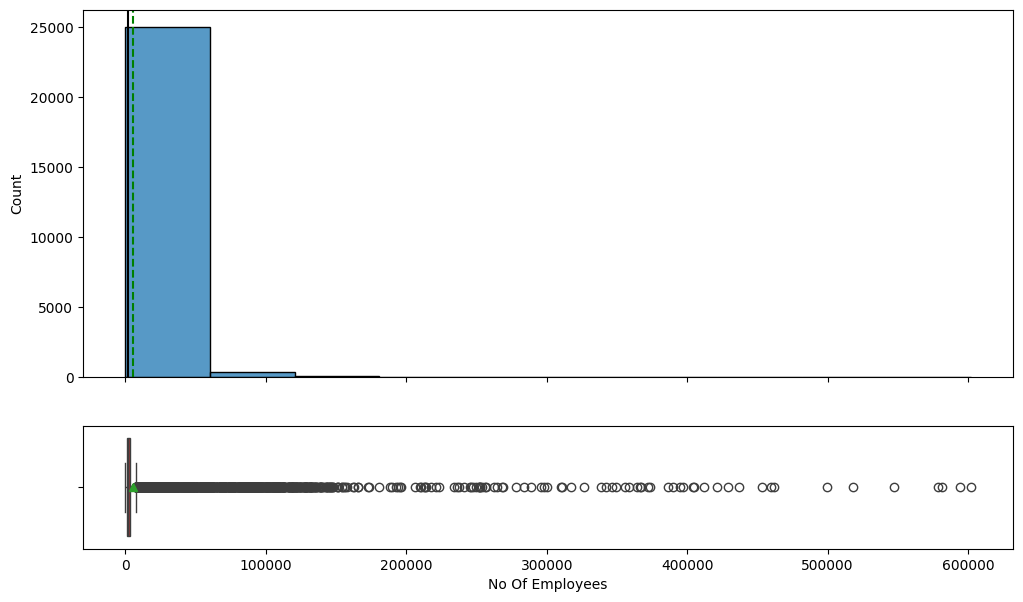

In [22]:
histogram_boxplot(visa, "no_of_employees",bins=10)

Observations on prevailing wage

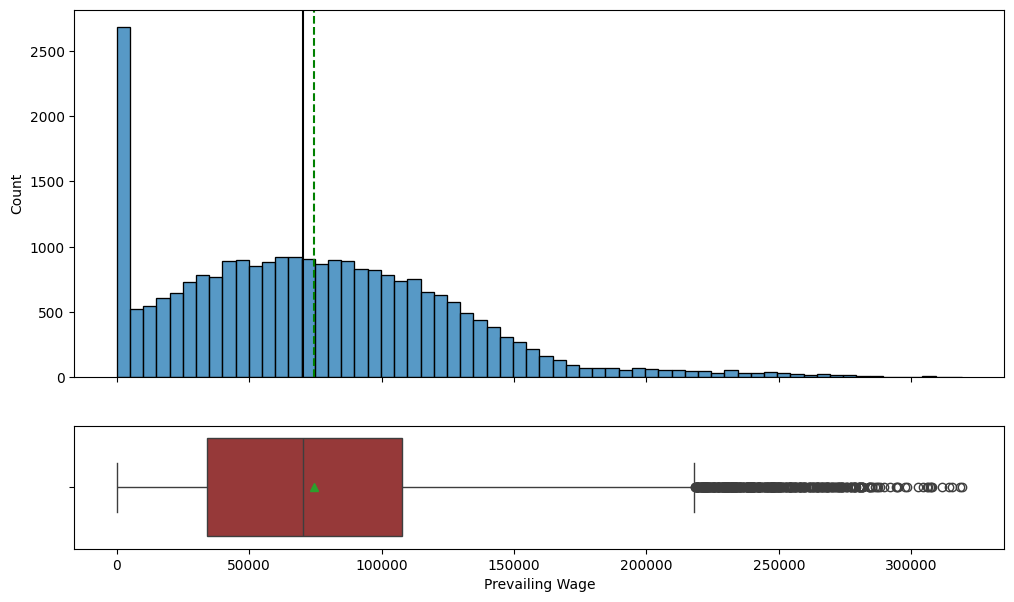

In [23]:
histogram_boxplot(visa, "prevailing_wage")

In [25]:
# checking the observations which have less than 100 prevailing wage
visa[visa["prevailing_wage"] < 100].shape
print(visa[visa["prevailing_wage"] < 100].shape)

(176, 13)


In [27]:
# checking the observations which have less than 100 prevailing wage
visa.loc[visa.prevailing_wage<100]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Number of employees
338,EZYV339,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified,NaN
634,EZYV635,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied,NaN
839,EZYV840,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied,NaN
876,EZYV877,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied,NaN
995,EZYV996,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25023,EZYV25024,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied,NaN
25258,EZYV25259,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied,NaN
25308,EZYV25309,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied,NaN
25329,EZYV25330,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied,NaN


In [28]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None,palette='Paired',figsize=(8,8)):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
        plt.tight_layout()
    else:
        plt.figure(figsize=(n + 1, 5))
        plt.tight_layout()

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette=palette,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.3f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=14,
            weight='bold',
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.xlabel('{}'.format(feature.replace('_',' ').title()))
    #plt.tight_layout()
    plt.savefig(feature+'_bars.png',dpi=200,bbox_inches='tight') # save
    plt.show()  # show the plot

Observations on continent

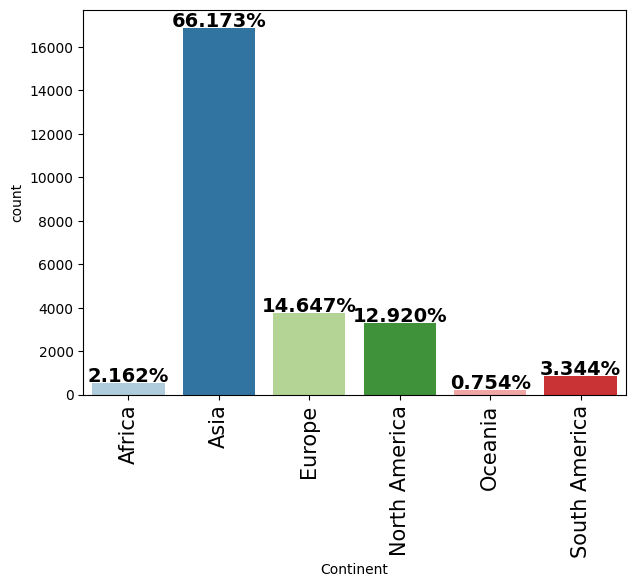

In [29]:
labeled_barplot(visa, "continent")

Observations on education of employee

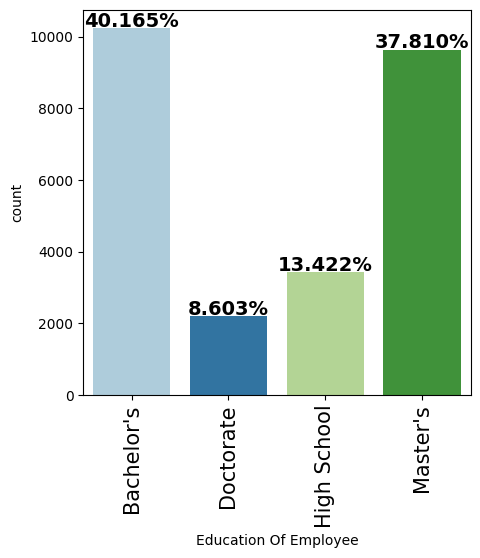

In [30]:
labeled_barplot(visa, "education_of_employee")

Observations on job experience

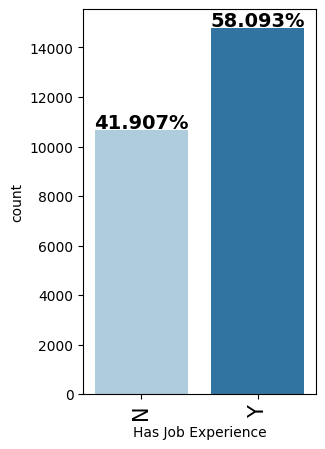

In [32]:
labeled_barplot(visa, "has_job_experience")

Observations on job training

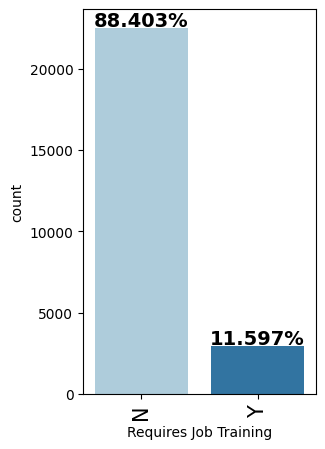

In [34]:
labeled_barplot(visa, "requires_job_training")

Observations on region of employment

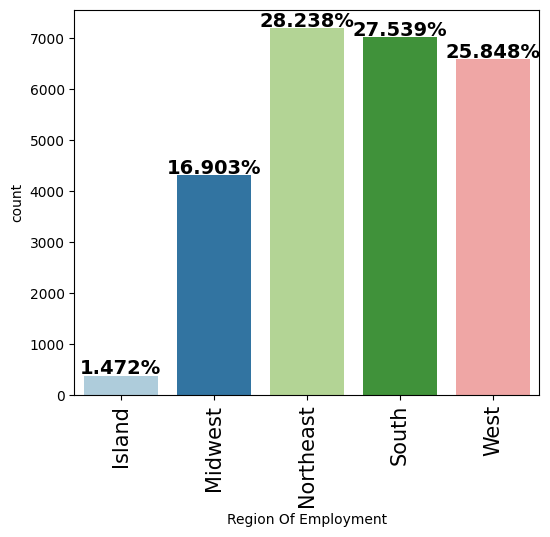

In [35]:
labeled_barplot(visa, "region_of_employment")

Observations on unit of wage

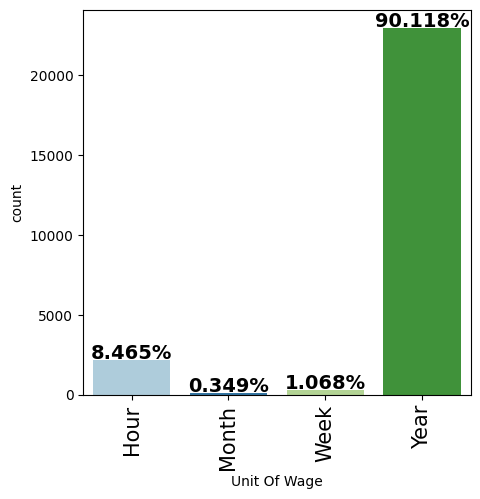

In [36]:
labeled_barplot(visa, "unit_of_wage")

Observations on case status

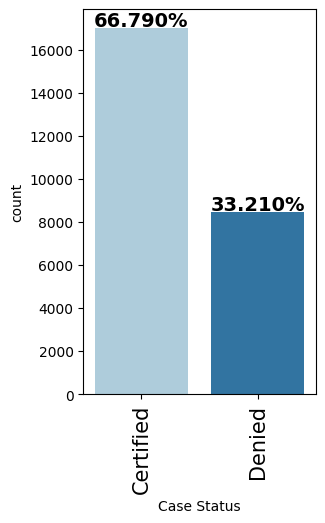

In [37]:
labeled_barplot(visa, "case_status")

Bivariate Analysis

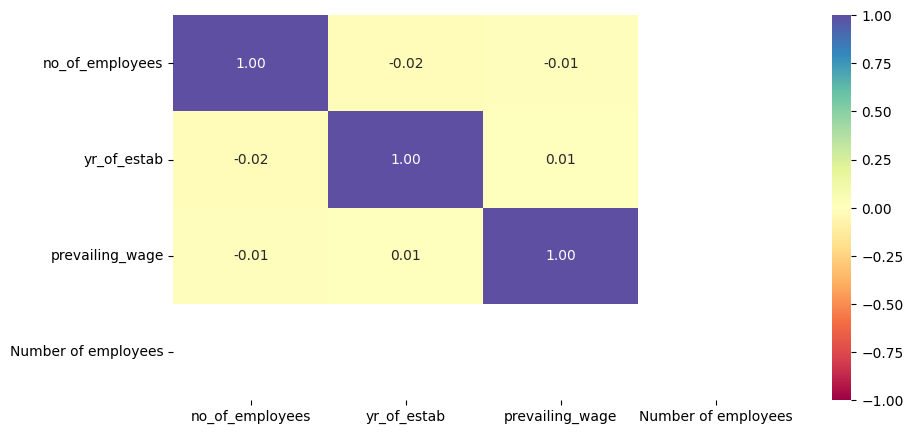

In [38]:
cols_list = visa.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    visa[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

Creating functions that will help us with further analysis

In [39]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )
    axs[0, 0].set_xlabel('{}'.format(predictor.replace('_',' ').title()))

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )
    axs[0, 1].set_xlabel('{}'.format(predictor.replace('_',' ').title()))

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 0].set_xlabel('{}'.format(target.replace('_',' ').title()))

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    axs[1, 1].set_xlabel('{}'.format(target.replace('_',' ').title()))
    plt.tight_layout()
    plt.savefig(predictor+target+'hist.png',dpi=200,bbox_inches='tight') # save
    plt.show()

In [40]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.xlabel('{}'.format(predictor.replace('_',' ').title()))
    plt.ylabel('{}'.format(target.replace('_',' ').title()))

    SMALL_SIZE = 12
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.savefig(predictor+target+'_stakedbars.png',dpi=200,bbox_inches='tight') # save
    plt.show()

Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


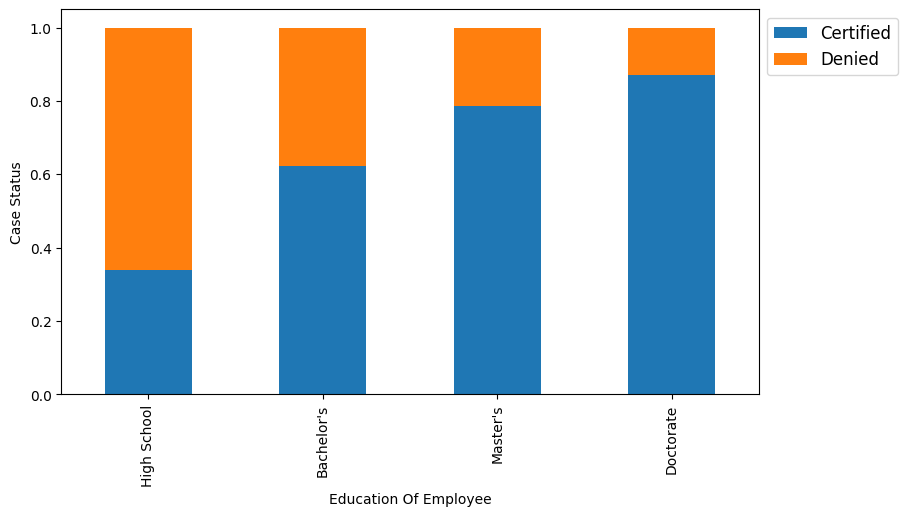

In [41]:
stacked_barplot(visa, "education_of_employee", "case_status")

Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

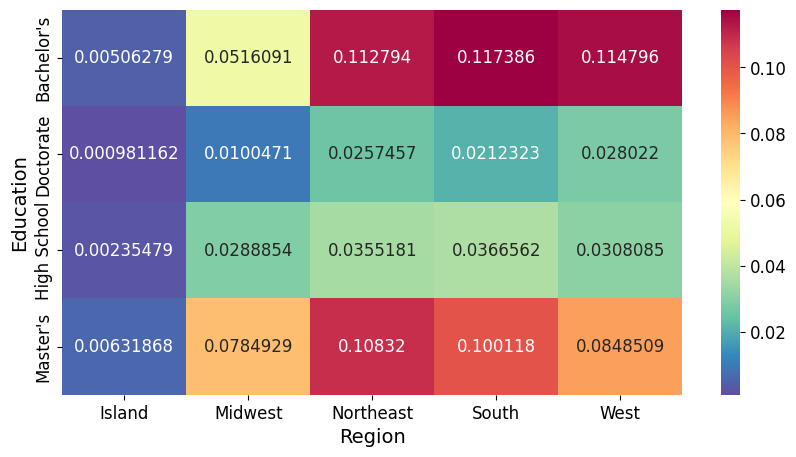

In [43]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(visa['education_of_employee'],visa['region_of_employment'],normalize=True),
    annot=True,
    fmt="g",
    cmap="Spectral_r"
) ## Complete the code to plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


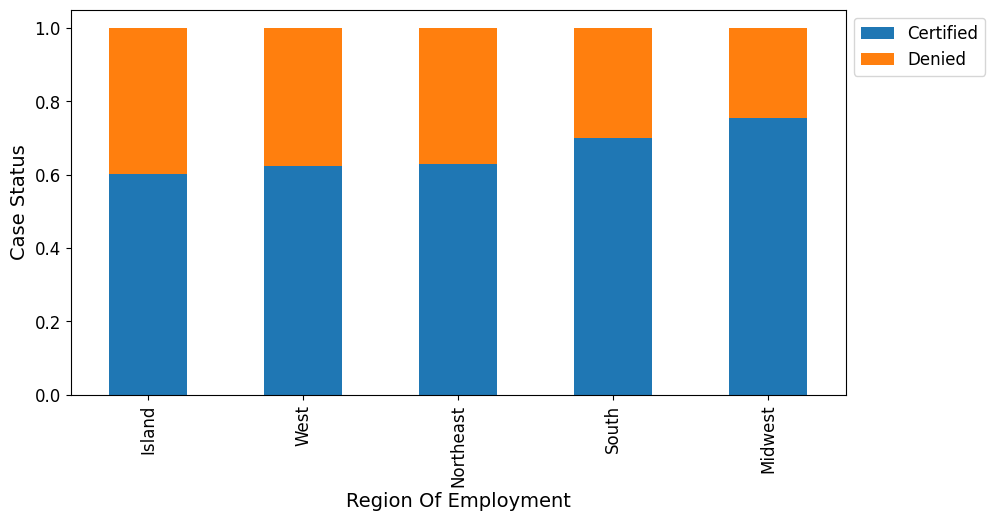

In [44]:
stacked_barplot(visa, "region_of_employment", "case_status")


Lets' similarly check for the continents and find out how the visa status vary across different continents

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


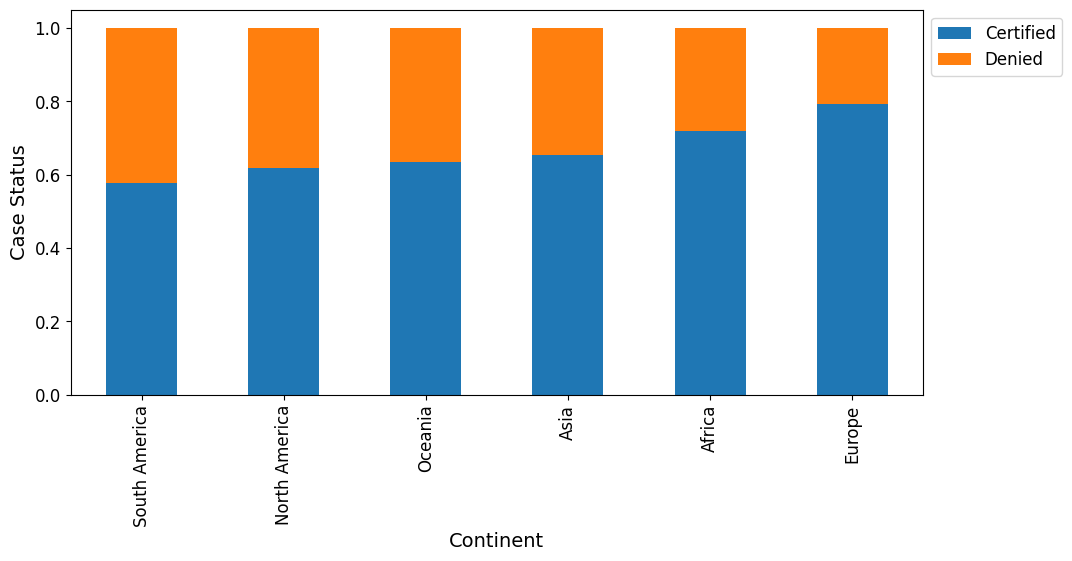

In [45]:
stacked_barplot(visa, "continent", "case_status")

Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certificatio

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


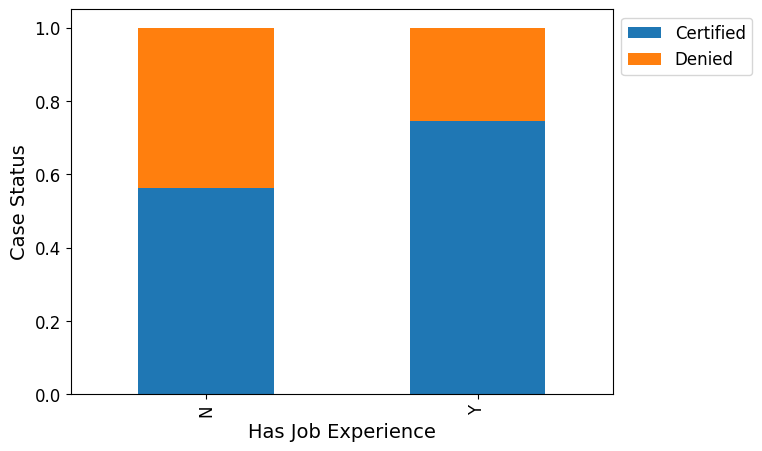

In [46]:
stacked_barplot(visa, "has_job_experience", "case_status")